In [1]:
import numpy as np
import pandas as pd
import os 
import glob
import pdb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy as sp
from scipy.special import expit
import sys

In [2]:
sys.path.append(os.path.dirname(os.getcwd()))
from visualisation_and_evaluation.helpers_eval import extract_scores, wa, select_best_run
from visualisation_and_evaluation.helpers_vizualisation import plot_scores

In [5]:
wd = os.getcwd()
path_scores = r'C:\Users\heida\Documents\ETH\Deep Learning\scores_04.01 - Copy\eval_scores'

files = [x for x in os.listdir(path_scores) if 'toy' in x and 'score' in x and 'subset' not in x and 'png' not in x]
selection_method = 'wa'  # 'wa' (weighted average), 'div' (based on divergence score only)
eval_all = pd.read_csv(os.path.join(path_scores, 'scores_baselines_toy.csv'), index_col=[0])
eval_all['silhouette_score_neg'] = -eval_all['silhouette_score']
for fname in files:
    if (fname == 'scores_baselines_toy.csv'):
        continue
    print(fname)
    df = extract_scores(path_scores, fname)
    # select "the best run"
    df_best = select_best_run(df, method=selection_method)
    df_best = df_best.loc[:, eval_all.columns]
    if df_best['sample'].values == 'toy':
        df_best['sample'] = 'sample1'
    eval_all = eval_all.append(df_best)
eval_all = eval_all.sort_values(['sample', 'method']).reset_index(drop=True)

scores_autoencoder_gan_diamond_narrower_batchnorm_toy.csv
scores_autoencoder_gan_diamond_wider_batchnorm_toy.csv
scores_residual_gan_full_panels_toy_sample1.csv
scores_residual_gan_wo_residuals_full_panels_toy_sample1.csv
scores_vanilla_gan_batchnorm_toy.csv


In [6]:
# add the weighted averaged score
eval_all['wa'] = eval_all[['divergence_score', 'entropy_score', 'silhouette_score_neg']].apply(lambda x: wa(x), axis=1)
eval_all

,divergence_score,entropy_score,method,sample,silhouette_score,silhouette_score_neg,wa
0,0.666738,-1.0,autoencoder gan diamond narrower batchnorm toy...,sample1,-0.048829,0.048829,0.513510
1,0.071145,-1.0,autoencoder gan diamond wider batchnorm toy.csv,sample1,-0.070570,0.070570,0.443099
2,0.028546,-1.0,combat,sample1,-0.069337,0.069337,0.437716
3,0.010673,-1.0,mnn,sample1,-0.075526,0.075526,0.435791
4,0.012873,-1.0,raw,sample1,-0.069232,0.069232,0.435752
5,0.046978,-1.0,reg,sample1,-0.036064,0.036064,0.438357
6,0.060172,-1.0,residual gan full panels toy,sample1,-0.043241,0.043241,0.440363
7,0.216434,-1.0,residual gan wo residuals full panels toy,sample1,-0.036618,0.036618,0.459462
8,0.119481,-1.0,vanilla gan batchnorm toy.csv,sample1,-0.042641,0.042641,0.447732


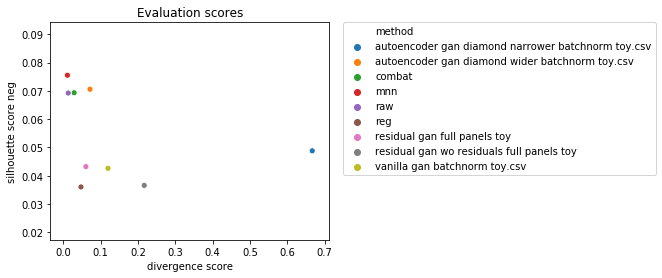

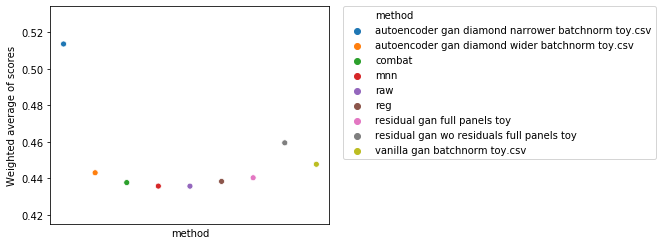

In [7]:
### plot scores
#f, axes = plt.subplots(1, 2, figsize=[10,4], sharex=True)
#plot_scores(eval_all, xcol='divergence_score', ycol='entropy_score',ax = axes[0], legend=False)
plt.figure(figsize=[5,4])
plot_scores(eval_all, xcol='divergence_score', ycol='silhouette_score_neg')
plt.savefig(os.path.join(path_scores, 'summary_scores_all_toy.png'),  bbox_inches='tight')

plt.figure(figsize=[5,4])
score_plot = sns.scatterplot(x='method', y='wa', data=eval_all,
                hue='method', legend='brief', ax = None)
handles, names = score_plot.get_legend_handles_labels()
score_plot.legend(handles, names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
score_plot.set_xticks([])
score_plot.set_ylabel('Weighted average of scores')
plt.savefig(os.path.join(path_scores, 
                         'summary_scores_wa_toy.png'),  bbox_inches='tight')